# $\beta$-sample size dependency

$\beta$ is defined as 

$\beta =  \frac{\langle ( \delta m)^2 \rangle_j}{\langle m \rangle_j^2}$,

where $m$ is the mean cloud mass flux. Since for a perfect exponential distribution the variance is equal to the square of the mean, $\beta$ is an indicator whether a distribution is narrower or broader than anexponential distribution.

In this notebook, we test how sensitive this parameter is to the size of the sample out of the exponential distribution. This allows us then to define a minimum sample size for which we trust our statistics. 

To do this we draw `n_sample` numbers from an exponential distribution and compute $\beta$. We repeat this `n_iter` times for each sample size and then look at the mean $\beta$. Since our original distribution is perfectly exponential, we expect to get $\beta = 1$.

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Define function to compute beta
def calc_beta(sample):
    return np.var(sample, ddof = 1)/np.mean(sample)**2

In [15]:
# Define settings
mean_m = 5.07e7   # Mean m from paper
n_iter = 100000    # Number of iterations
# Define artificial sample sizes
n_sample = (range(2,100,1) + range(100, 1000, 20) + range(1000, 2000, 200))

In [16]:
# Loop over sample sizes and compute mean beta over all iterations
beta_list = []
for ns in n_sample:
    tmplist_beta = []
    for ni in range(n_iter):
        sample_beta = np.random.exponential(mean_m, ns)
        tmplist_beta.append(calc_beta(sample_beta))
    beta_list.append(np.mean(tmplist_beta))

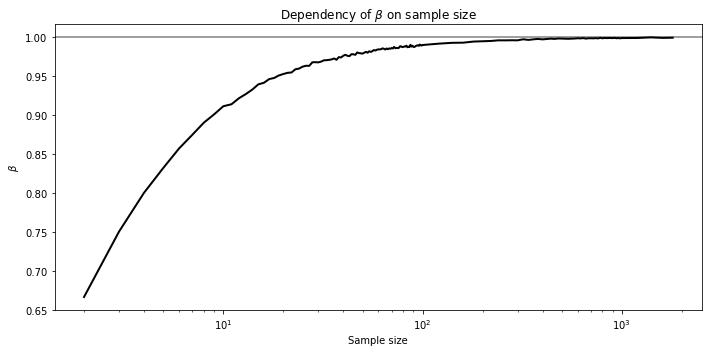

In [17]:
# Plot result
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(n_sample, beta_list, linewidth = 2, c = 'k')
ax.set_xlabel('Sample size')
ax.set_ylabel(r'$\beta$')
ax.set_xscale('log')
ax.set_title(r'Dependency of $\beta$ on sample size')
ax.axhline(1, color='gray', zorder=0.1)
plt.tight_layout()

## Result

There is a clear dependency of $\beta$ on the size of the sample. For a sample size of 10, $\beta$ is approximately 0.9. For a sample size of 100, $\beta$ approaches one. For the analysis in our paper we therefore decide to drop all grid points which have 10 or less clouds. While this still leaves a small bias, this threshold should remove the most drastic outliers.